# Libraries

In [1]:
pip install tensorflow

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras import layers 
from keras import models
from keras.datasets import mnist 
from keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Importing dataset and Split it as Test and Train sets
mnist=tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  #Loads the MNIST dataset.
print(test_images.shape)
print(train_images.shape)
test_y=test_labels

(10000, 28, 28)
(60000, 28, 28)


In [5]:
display(train_images[2])


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [6]:
print(train_labels[59999])

8


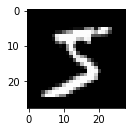

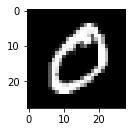

In [7]:
for i in range(2):  
    plt.subplot(130 + 2 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

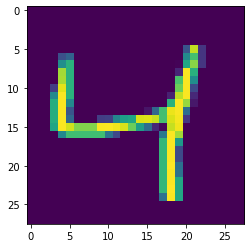

In [8]:
#Check How Data loook Like


plt.imshow(train_images[2])
plt.show #Show Graph


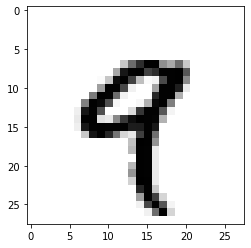

In [9]:
plt.imshow(train_images[4],cmap=plt.cm.binary)

#It is most common to use 32-bit precision when training a neural network, so at one point the training data will have to be converted to 32 bit floats.
Since the dataset fits easily in RAM, we might as well convert to float immediately.

Regarding the division by 255, this is the maximum value of a byte 
(the input feature's type before the conversion to float32), so this will ensure that the input features are scaled between 0.0 and 1.0.
 This is not compulsory, but I usually prefer to have input features about that scale so that the default learning rate
 (and other hyperparameters) work reasonably well, and so that the cost can take on reasonable values that I am used to.
 For example, suppose the scale is 100 times the scale you are used to, then the learning rate should be 100 times 
 smaller than you are used to, and the loss will be larger than usual (if it is the mean squared error,
                the loss will likely be 100^2=10000 times larger than you are used to).

In [10]:
#Re-shaping Data
train_images = train_images.reshape((60000, 28, 28, 1)) ##increasing one dimension for kernel operation
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

ReLU. The ReLU function is another non-linear activation function that has gained popularity in the deep learning domain. ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

Kernel: In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.

Here we are learning a total of 32 filters and then we use Max Pooling to reduce the spatial dimensions of the output volume.
As far as choosing the appropriate value for no. of filters, it is always recommended to use powers of 2 as the values.

# Creating a Deep Neural Network

In [11]:
### Create Neural Network
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) ## 1st convolution layer to mention input layer size
model1.add(layers.MaxPooling2D((2, 2)))  #Maxpooling ie single max value of 2x2 matrix will get and remaining will drop 
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))  ##2nd convolution layer
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu')) ##3rd convolution layer

model1.add(layers.Flatten())  ##before using fully connected layer,need to be flatten so that 2D to 1D
model1.add(layers.Dense(64, activation='relu')) ##Fully Connected Layer
#last Fully connected layer,output must be equal to number of classes,10(0-9)
model1.add(layers.Dense(10, activation='softmax')) #last dense layer must be equal to 10
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

RMSprop uses an adaptive learning rate instead of treating the learning rate as a hyperparameter. This means that the learning rate changes over time.

Cross entropy loss function is an optimization function which is used in case of training a classification model which classifies the data by predicting the probability of whether the data belongs to one class or the other class.

In [12]:

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history=model1.fit(train_images, train_labels, epochs=5, batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 35s 43ms/step - loss: 0.1930 - accuracy: 0.9386 - val_loss: 0.0589 - val_accuracy: 0.9835
Epoch 2/5
750/750 [==============================] - 34s 45ms/step - loss: 0.0509 - accuracy: 0.9843 - val_loss: 0.0542 - val_accuracy: 0.9837
Epoch 3/5
750/750 [==============================] - 33s 44ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0664 - val_accuracy: 0.9815
Epoch 4/5
750/750 [==============================] - 33s 44ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0404 - val_accuracy: 0.9896
Epoch 5/5
750/750 [==============================] - 34s 45ms/step - loss: 0.0215 - accuracy: 0.9935 - val_loss: 0.0496 - val_accuracy: 0.9872


In [13]:
test_loss,test_acc=model1.evaluate(test_images,test_labels)
print("Test loss on 10,000 test sample",test_loss)
print("Test laccuracy on 10,000 test sample",test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0369 - accuracy: 0.9890
Test loss on 10,000 test sample 0.03691641241312027
Test laccuracy on 10,000 test sample 0.9890000224113464


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


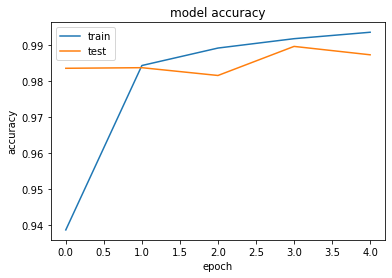

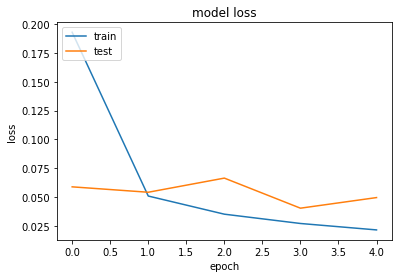

In [14]:
print(history.history.keys())

# summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model1.save('C:\\Users\\santo\\Desktop\\Cdac Final Project\\mnist_modeldigit.h5')

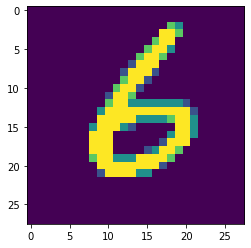

In [16]:
plt.imshow(train_images[66])

In [17]:
y_predicted=model1.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [18]:
y_predicted[66] #predict the scores

array([2.3818127e-05, 8.3518824e-11, 7.3670318e-13, 2.0923888e-12,
       7.3215690e-11, 1.9689047e-08, 9.9997592e-01, 8.2226991e-14,
       2.3279163e-07, 9.2509708e-11], dtype=float32)

In [19]:
np.argmax(y_predicted[66] ) #Prediction the label

6

In [20]:
#Confusion Matrix

In [21]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [22]:
test_y[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
cm=tf.math.confusion_matrix(labels=test_y,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

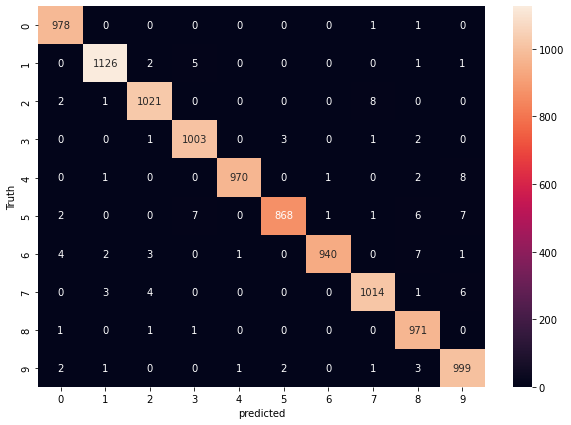

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [25]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [26]:
#Creating UI
from tkinter import *

import cv2
import numpy as np
from PIL import ImageGrab
from keras.models import load_model
import webbrowser
model = load_model('C:\\Users\\santo\\Desktop\\Cdac Final Project\\mnist_modeldigit.h5')
image_folder = "C:\\Users\\santo\\Desktop\\Cdac Final Project"


# GUI

In [27]:
from tkinter import *

import cv2#pip install opencv-python
import numpy as np
from PIL import ImageGrab
from keras.models import load_model
import webbrowser



root = Tk()
root.resizable(0, 0)
root.title("Digit Recognition System")

lastx, lasty = None, None
image_number = 0

cv = Canvas(root, width=800, height=600, bg='white')
cv.grid(row=0, column=0, pady=2, sticky=NSEW, columnspan=2)


def clear_widget():
    global cv
    cv.delete('all')


def draw_lines(event):
    global lastx, lasty
    x, y = event.x, event.y
    cv.create_line((lastx, lasty, x, y), width=8, fill='black', capstyle=ROUND, smooth=TRUE, splinesteps=12)
    lastx, lasty = x, y


def activate_event(event):
    global lastx, lasty
    cv.bind('<B1-Motion>', draw_lines)
    lastx, lasty = event.x, event.y


cv.bind('<Button-1>', activate_event)


def Recognize_Digit():
    global image_number
    filename = f'img_{image_number}.png'
    widget = cv

    x = root.winfo_rootx() + widget.winfo_rootx()
    y = root.winfo_rooty() + widget.winfo_rooty()
    x1 = x + widget.winfo_width()
    y1 = y + widget.winfo_height()
    print(x, y, x1, y1)

    # get image and save
    ImageGrab.grab().crop((x, y, x1, y1)).save(image_folder + filename)

    image = cv2.imread(image_folder + filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # make a rectangle box around each curve
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = th[y:y + h, x:x + w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18, 18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

        digit = padded_digit.reshape(1, 28, 28, 1)
        digit = digit / 255.0

        pred = model.predict([digit])[0]
        final_pred = np.argmax(pred)

        data = str(final_pred) + ' ' + str(int(max(pred) * 100)) + '%'

        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 0.5
        color = (255, 0, 0)
        thickness = 1
        cv2.putText(image, data, (x, y - 5), font, fontScale, color, thickness)

    cv2.imshow('Predictions', image)
    cv2.waitKey(0)
    
def callback():
        webbrowser.open_new(r"www.google.com")    
btn_save = Button(text='Recognize Digits',width=15, height=3, command=Recognize_Digit)
btn_save.grid(row=2, column=0, pady=1, padx=1)
button_clear = Button(text='Clear Output',width=15, height=3, command=clear_widget)
button_clear.grid(row=2, column=1, pady=1, padx=1)
button_info = Button(text='Feedback', width=15, height=2, command=callback)
button_info.grid(row=3, column=0, pady=1, padx=1)

root.mainloop()


172 104 976 708
1/1 [==============================] - 0s 20ms/step
-64000 -63998 -63196 -63394
1/1 [==============================] - 0s 27ms/step
